# Assignment on Regression and Classification

In [4]:
import pandas as pd

##### 1. Go through position_salaries.csv file and show that it is not following linear regression and can be best modelled with polynomial regression. It consists of only two fields’ position and salary.

InvalidIndexError: (slice(None, None, None), None)

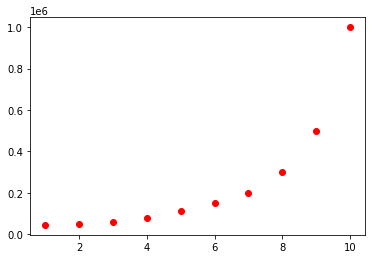

In [9]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
df = pd.read_csv("position_salaries.csv")
position_type = {'Business Analyst': 1,'Junior Consultant': 2,'Senior Consultant': 3,'Manager': 4,'Country Manager':5,
'Region Manager': 6,'Partner': 7,'Senior Partner': 8,'C-level': 9,'CEO': 10}
df['position_type'] = df['Position'].apply(position_type.get)
X = df[['position_type']]
Y = df['Salary']
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=1/3,random_state=0)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)
plt.scatter(X,Y,color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
r_sq = lin_reg.score(X,Y)
print('Coefficient of Determination:', r_sq)

##### 2. Go through “Student-Pass-Fail-Data.csv" where self -study daily and tuition monthly are the two influential factors where 1 is pass and 0 is for fail. Use logistic regression and now reduce the number of rows to half and see the success rate has it influenced by the data.

In [8]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv("Student-Pass-Fail-Data.csv")
df.head()
x = df.drop("Pass_Or_Fail",axis = 1)
y = df.Pass_Or_Fail
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)
LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class='warn',n_jobs=None,penalty='l2',random_state=None,solver='warn',tol=0.0001,verbose=0,warm_start=False)
y_pred = logistic_regression.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy_percentage = 100 * accuracy
print("The percentage of accurate prediction = ",accuracy_percentage,"%")

The percentage of accurate prediction =  96.8 %


##### 3. Use sklearn. datasets import load_iris use k-neighbour classifier to classify the three flowers to setosa, vesicolor and Virginica.

In [9]:
from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target=pd.DataFrame(target,columns=['target'])
df_merged=df_data.join(df_target)
df_merged['class']=df_merged['target'].apply(lambda x: "Iris-setosa" if x==0 else ("Iris-versicolor" if x==1 else "Iris-virginica"))
df_merged.head(150)

,sepal_length,sepal_width,petal_length,petal_width,target,class
0,5.1,3.5,1.4,0.2,0,Iris-setosa
1,4.9,3.0,1.4,0.2,0,Iris-setosa
2,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5.0,3.6,1.4,0.2,0,Iris-setosa
5,5.4,3.9,1.7,0.4,0,Iris-setosa
6,4.6,3.4,1.4,0.3,0,Iris-setosa
7,5.0,3.4,1.5,0.2,0,Iris-setosa
8,4.4,2.9,1.4,0.2,0,Iris-setosa
9,4.9,3.1,1.5,0.1,0,Iris-setosa


##### 3. Use sklearn. datasets import load_iris use k-neighbour classifier to classify the three flowers to setosa, vesicolor and Virginica.

['setosa' 'versicolor' 'virginica']
(150, 4)
(105, 4)
(45, 4)
Confusion Matrix:
[[11  0  0]
 [ 0 17  2]
 [ 0  0 15]]
Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.89      0.94        19
          2       0.88      1.00      0.94        15

avg / total       0.96      0.96      0.96        45

virginicia
virginicia


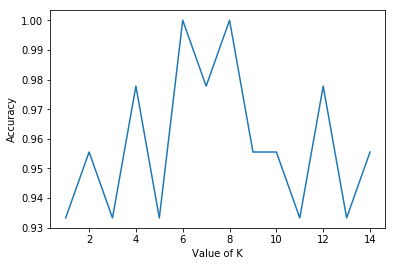

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.target_names)
print(iris.data.shape)
X = iris.data[:, :4]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

range_k = range(1,15)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

import matplotlib.pyplot as plt
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

classes = {0:'setosa',1:'versicolor',2:'virginicia'}
x_new = [[1,1,1,1],[4,3,1.3,0.2]]
y_predict = classifier.predict(x_new)
print(classes[y_predict[0]])
print(classes[y_predict[1]])

##### 4. From sklearn.datasets import make regression and fit the data and perform the linear regression. Use scatter plot.

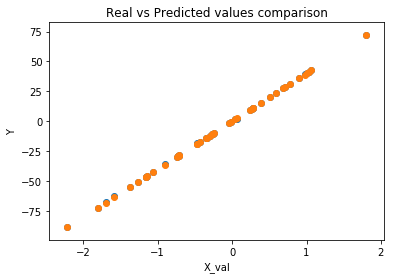

In [5]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
X,Y = make_regression(n_samples=150, n_features=1, noise=0.2)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
plt.xlabel('X_val')
plt.ylabel('Y')
plt.title('Real vs Predicted values comparison')
plt.scatter(X_test,Y_test)
plt.scatter(X_test,Y_pred)

##### 5. Take Y= [ 5, 4, 3, 6,7, 8,9, 5,4,,3,1] , X= [ yoe, level, leow, city] such that yoe and leow is directly proportional to the data and level is moderately dependent and calculate R2 and equation slope and intercept for yoe, level and leow which is the best parameter

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
yoe = np.array([3,2,1,3,4,5,5,3,2,1,1]).reshape(-1, 1)
level = np.array([2,1,0,3,4,4,5,2,1,0,0]).reshape(-1, 1)
leow = np.array([5,3,2,5,5,8,8,4,3,2,0]).reshape(-1, 1)
city = np.array([1,1,2,5,4,3,6,7,4,2,3]).reshape(-1, 1)
Y = np.array([5,4,3,6,7,8,9,5,4,3,1])
X = np.array([yoe, level, leow, city]).reshape(11,4)
model = LinearRegression()
model.fit(X, Y)
print("\n############## X = [yoe, level, leow, city] ##############\n")
r_sq = model.score(X,Y)
print('R-squared = ',r_sq)
print("\n######################## X = [yoe] ########################")
X = yoe
model = LinearRegression()
model.fit(X, Y)
r_sq = model.score(X,Y)
print('R-squared = ',r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
b0 = (model.intercept_).round(4)
b1 = (model.coef_[0]).round(4)
print("The required equation is -->",b0,"+",b1,"* X ")
print("\n######################## X = [level] ########################")
X = level
model = LinearRegression()
model.fit(X, Y)
r_sq = model.score(X,Y)
print('R-squared = ',r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
b0 = (model.intercept_).round(4)
b1 = (model.coef_[0]).round(4)
print("The required equation is -->",b0,"+",b1,"* X ")
print("\n######################## X = [leow] ########################")
X = leow
model = LinearRegression()
model.fit(X, Y)
r_sq = model.score(X,Y)
print('R-squared = ',r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
b0 = (model.intercept_).round(4)
b1 = (model.coef_[0]).round(4)
print("The required equation is -->",b0,"+",b1,"* X ")


############## X = [yoe, level, leow, city] ##############

R-squared =  0.500401767266164

######################## X = [yoe] ########################
R-squared =  0.9306206088992974
intercept: 0.8196721311475397
slope: [1.53278689]
The required equation is --> 0.8197 + 1.5328 * X 

######################## X = [level] ########################
R-squared =  0.9380580357142857
intercept: 2.4375
slope: [1.28125]
The required equation is --> 2.4375 + 1.2812 * X 

######################## X = [leow] ########################
R-squared =  0.9525319829424307
intercept: 1.1716417910447765
slope: [0.9358209]
The required equation is --> 1.1716 + 0.9358 * X 


##### 6. Take Y= [ 5,4,3,6,7,8,9,5,4,3] and X= [[3,2], [2,1], [1,0],[3,3],[4,4],[5,4],[5,5],[3,2],[2,1],[1,0]] Where x0= yoe and x1= level. Calculate R2 and equation slope and intercept.

In [7]:
Y_=[ 5,4,3,6,7,8,9,5,4,3]
X_= [[3,2],[2,1],[1,0],[3,3],[4,4],[5,4],[5,5],[3,2],[2,1],[1,0]]
X_ = pd.DataFrame(X_, columns=['yoe', 'level'])
model = LinearRegression().fit(X_, Y_)
model.score(X_, Y_)
model.intercept_
model.coef_
model.predict(X_)

array([5.29166667, 4.03125   , 2.77083333, 6.07291667, 7.33333333,
       7.8125    , 8.59375   , 5.29166667, 4.03125   , 2.77083333])

##### 7. Take the following x = np.arange(10).reshape(-1, 1) and y = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1]) Design a Logistic Regression. What value of c gives you optimum result. Modify your model till you get 100% accuracy. (c=1,5,10) show the result.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
print(x)
print(y)
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)
pred_m = model.predict(x)
print(pred_m)
print("Accuracy Score: ", round(accuracy_score(pred_m, y) * 100, 2))

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]
[0 0 0 1 1 1 1 1 1 1]
Accuracy Score:  90.0
